### 1.1
What is the value of $\sqrt{2}^{\sqrt{2}^{{\sqrt{2}^{...}}}}$?

In [1]:
import math
a=math.sqrt(2)
value=math.sqrt(2)
for i in range(1000):
    value=a**value
value

2.0000000000000004

### 3.1
You have a bag with two coins. One will come up heads 40% of the time, and the other will come up heads 60%. You pick a coin randomly, flip it and get a head. What is the probability it will be heads on the next flip?

In [2]:
import numpy as np
class Coin(object):
    def __init__ (self,p):
        self.prob_heads=p
    def flip_is_head(self):
        return np.random.random()<self.prob_heads
    def __repr__ (self):
        return 'The coin has probality of heads='+str(self.prob_heads)

class Bag_of_coins(object):
    def __init__(self):
        self.coins=[]
    def add_coin(self,coin):
        self.coins.append(coin)
    def pick_random_coin(self):
        return np.random.choice(self.coins)
    
bag=Bag_of_coins()
bag.add_coin(Coin(0.4))
bag.add_coin(Coin(0.6))

num_trials=100000
trial_ctr=0
head_ctr=0
while trial_ctr < num_trials:
    coin=bag.pick_random_coin()
    if coin.flip_is_head():
        trial_ctr+=1
        if coin.flip_is_head():
            head_ctr+=1
head_ctr/trial_ctr
    
    

0.52104

### 3.5
Starting at one vertex of a cube, and moving randomly from vertex to adjacent vertices, what is the expected number of moves until you reach the  vertex opposite from your starting point?

### 3.8
You have a spinner that generates random numbers that are uniform between 0 and 1. You sum the spins until the sum is greater than one. What is the expected number of spins?

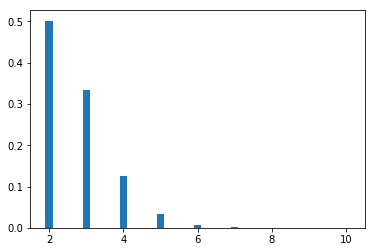

In [53]:
import numpy as np
import matplotlib.pyplot as plt

number_of_trials=100000
trial_result=[]
for i in range(number_of_trials):
    spin_times=0
    sumofspin=0
    while sumofspin<=1:
        sumofspin+=np.random.random()
        spin_times+=1
    trial_result.append(spin_times)

result_bins=np.max(trial_result)-np.min(trial_result)+1
plt.hist(trial_result,bins=result_bins,normed=True,align='left',rwidth=0.2,range=(2,2+result_bins))
plt.show()


### 3.10
A stick is broken randomly into 3 pieces. What is the probability of the pieces being able to form a triangle?

### 3.11
A stick is broken randomly into two pieces. The larger piece is then broken randomly into two pieces. What is the probability of the pieces being able to form a triangle?

### 3.12

This is based on a Goldman Sachs interview question. You play a game
where you toss two fair coins in the air. You always win $1. However, if you
have tossed 2 heads at least once, and 2 tails at least once, you surrender all
winnings, and cannot play again. You may stop playing at anytime. What’s
your strategy?


0.94


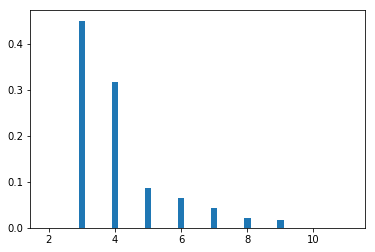

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class TwoDiceGame(object):
    def play(self):
        winnings=0
        two_of_same_seen=False
        while True:
            if two_of_same_seen:
                if winnings >=3:
                    #our strategy : quit if we have 3+ in this case
                    return winnings
                if np.random.randint(4)==0:
                    #bad luck:both HH and TT seen, lost it all
                    return 0
            else:
                two_of_same_seen = np.random.randint(2)==0
                winnings+=1
                
game=TwoDiceGame()
num_trials=1000
trials=[game.play() for _ in range(num_trials)]
num_bins=np.max(trials)-np.min(trials)+1

print(np.mean(trials))

plt.hist(trials, bins=num_bins, normed=True, align='left', rwidth=0.2, range=(2,2+num_bins))
plt.show()

### 5.2
You have a basket of $n$ assets. The asset returns are multivariate normal with zero mean. Correlation between any pair of assets is 1/2. What is the probability that $k$ of the assets will have positive return?